In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt


In [2]:
csv_files_shingo = [
            '../../data/2023-10-17_DR/NNVT_CH0_PN2304-1470_900v_CH1_PN2305-1100_900v_dr.csv',
            '../../data/2023-10-17_DR/NNVT_CH0_PN2304-1470_1000v_CH1_PN2305-1100_1000v_dr.csv',
            '../../data/2023-10-17_DR/NNVT_CH0_PN2304-1470_1100v_CH1_PN2305-1100_1100v_dr.csv',
            '../../data/2023-10-17_DR/NNVT_CH0_PN2304-1470_1200v_CH1_PN2305-1100_1200v_dr.csv',
            '../../data/2023-10-17_DR/NNVT_CH0_PN2304-1470_1300v_CH1_PN2305-1100_1300v_dr.csv'
            ]
csv_files_alex = [
            '../../from_Alex/pmt_measurements/dr/202308221609_900v_dr.csv',
            '../../from_Alex/pmt_measurements/dr/202308221609_1000v_dr.csv',
            '../../from_Alex/pmt_measurements/dr/202308221609_1100v_dr.csv',
            '../../from_Alex/pmt_measurements/dr/202308221609_1200v_dr.csv',
            '../../from_Alex/pmt_measurements/dr/202308221609_1300v_dr.csv'
            ]
channel_labels = ['PN2304-1470', 'PN2305-1100', 'KM6206', 'PN2209-4017', 'PN2209-4010']
HVs = [900, 1000, 1100, 1200, 1300]

markers = ['o', 's', 'v', '^']
colors = ("b", "g", "r", "c", "m", "y", "k")

fontsize = 15

## Dark rate vs Threshold ##

/tmp/ipykernel_1571931/1959849613.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DR_HV_tmp['HV']=HVs[i]
/tmp/ipykernel_1571931/1959849613.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DR_HV_tmp['HV']=HVs[i]
/tmp/ipykernel_1571931/1959849613.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

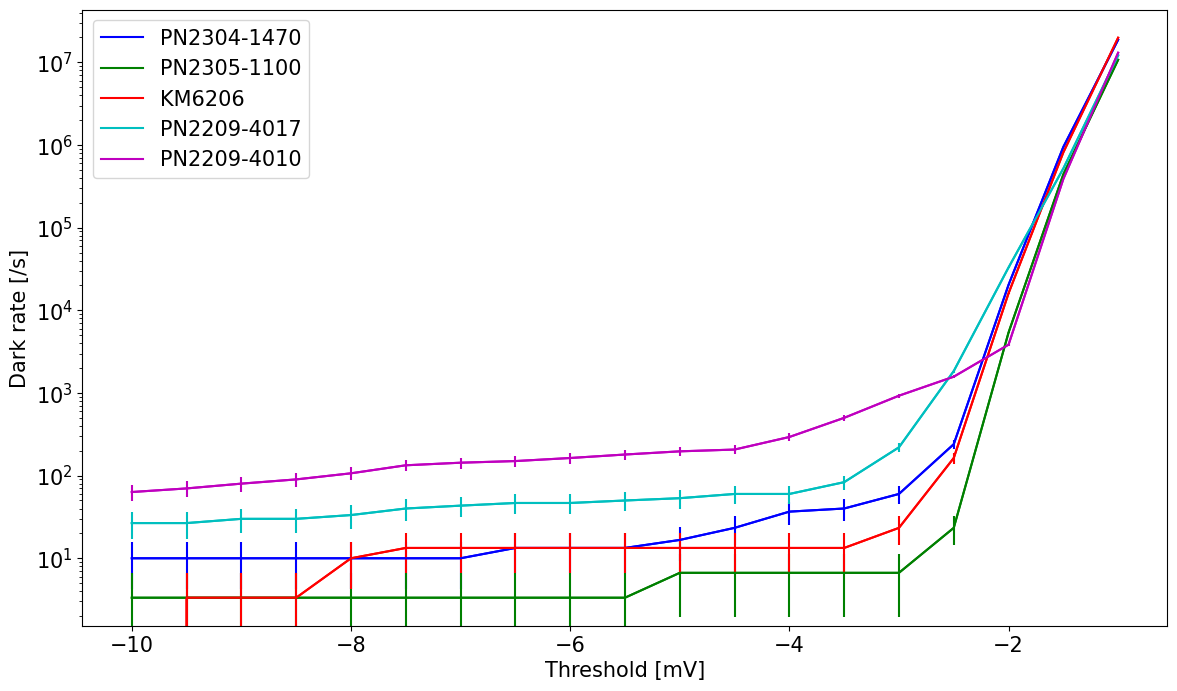

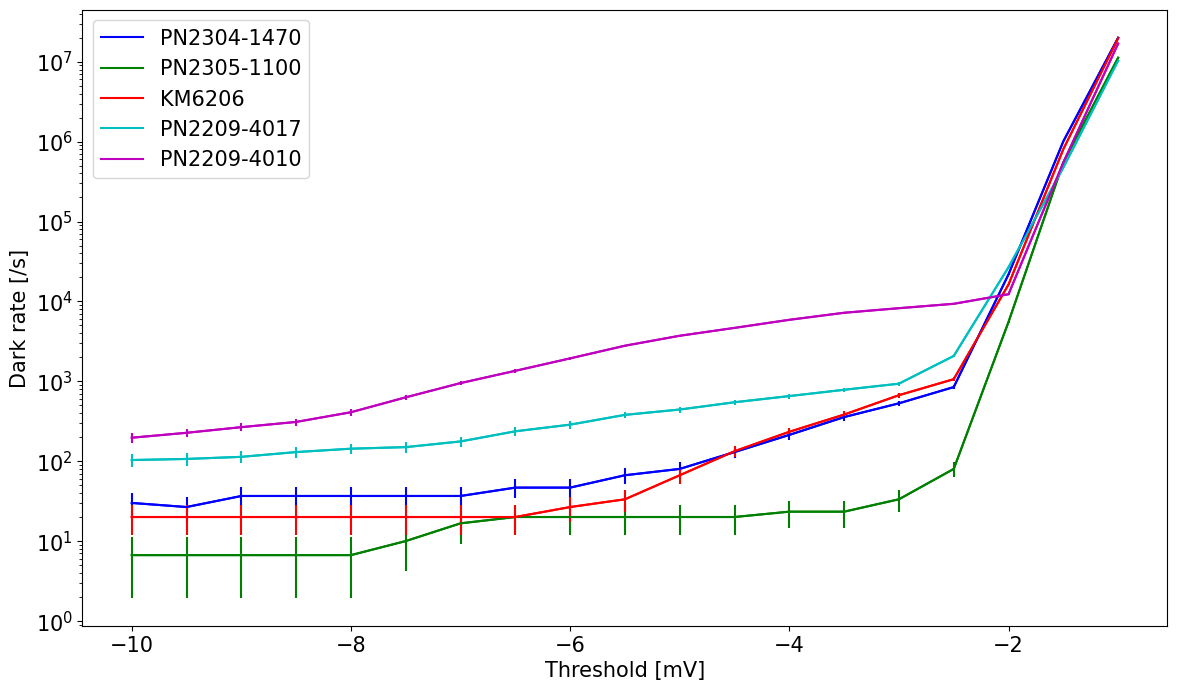

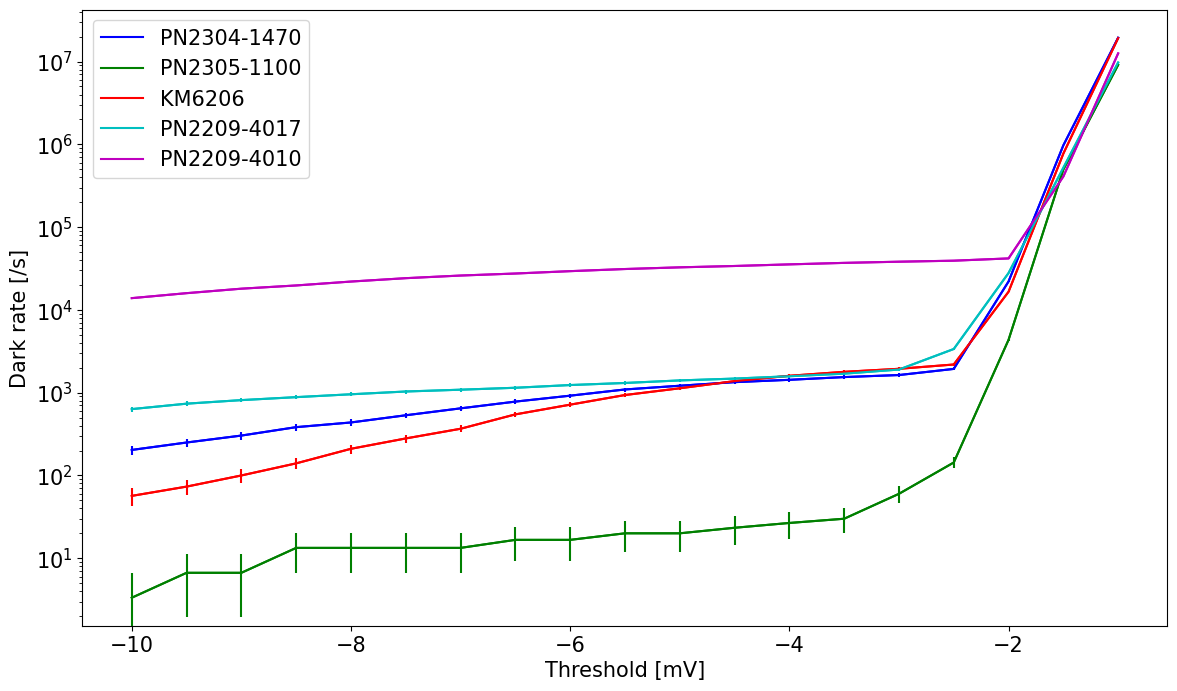

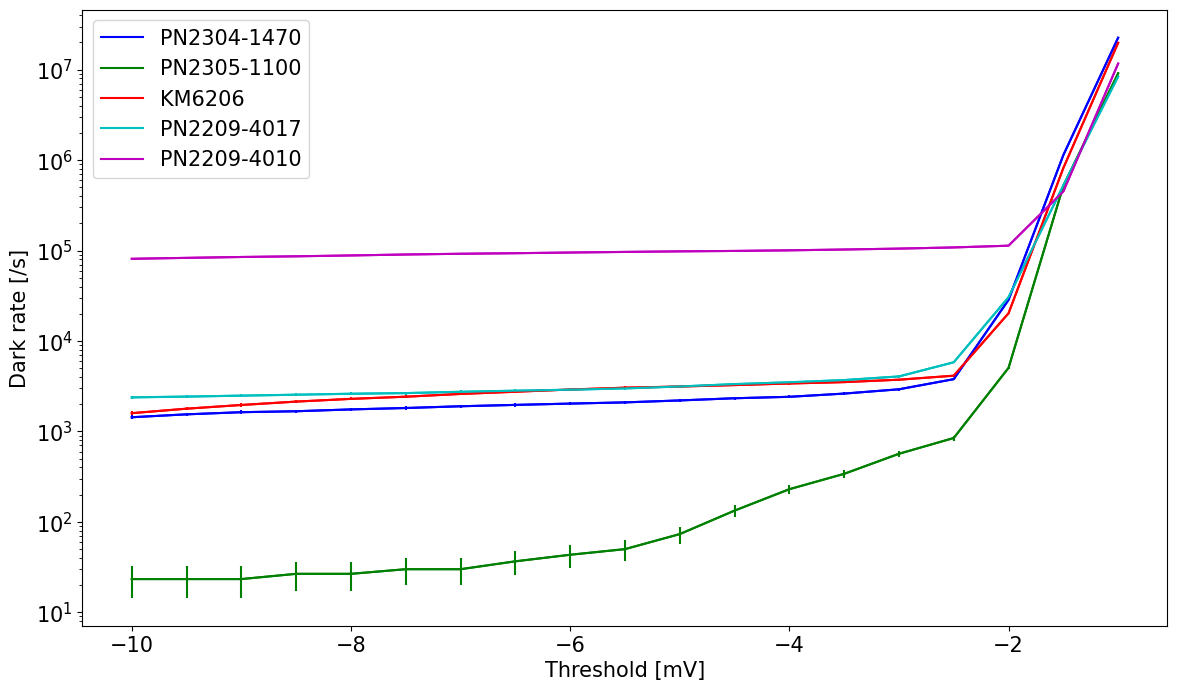

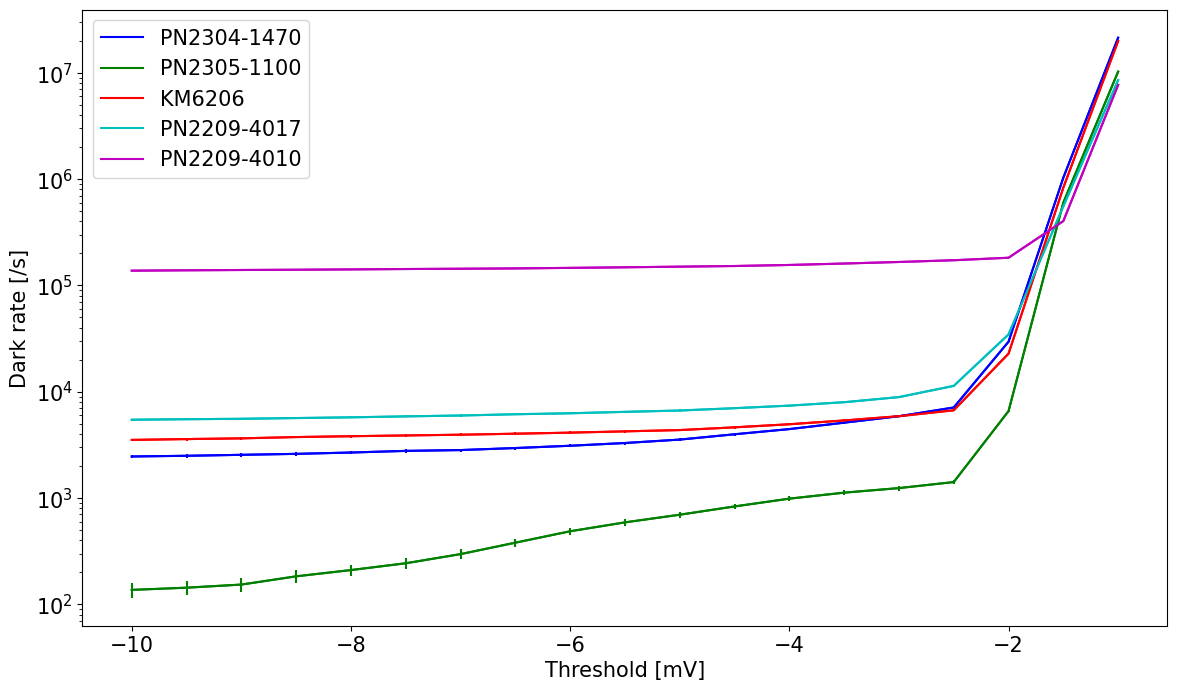

In [3]:
date_time_now = dt.now().strftime('%Y%m%d%H%M%S')

df_DR_HV = pd.DataFrame()

for i in range(len(csv_files_shingo)):
    dr_fig, dr_ax = plt.subplots()
    df_shingo = pd.read_csv(csv_files_shingo[i])
    df_alex = pd.read_csv(csv_files_alex[i])
    df_comb = pd.concat([df_shingo, df_alex], axis=1)
    
    
    cols = df_comb.columns.to_list()
    for col in cols:
        #if '_passes' in col:
        if (not 'threshold' in col) and (not 'error' in col):
            df_comb.drop([col], axis=1, inplace=True)
    df_comb = df_comb.loc[:,~df_comb.columns.duplicated()]
    new_cols = ['threshold']+channel_labels
    df_comb.columns = new_cols
    df_comb.set_index('threshold', inplace=True)
    #print(df_comb)
    
    ### DR vs HV ##
    df_DR_HV_tmp = df_comb[df_comb.index.values == -8.]
    df_DR_HV_tmp['HV']=HVs[i]
    df_DR_HV = pd.concat([df_DR_HV, df_DR_HV_tmp], axis=0)
    
    for idx,col in enumerate(new_cols[1:]):      
        if 'KM' in col:
            marker = markers[0]
        elif 'PN' in col:
            marker = markers[1]
            if 'PN23' in col:
                marker = markers[2]
        if '(NNVT)' in col:
            marker = markers[3]
        color=colors[idx]
        
        if type(df_comb[col].values[0]) != str:
            val =  [float(str_v) for str_v in df_comb[col].values]
            err = []
        else:
            val = [ str_v.replace('(', '').replace(')','').split(',')[0] for str_v in df_comb[col].values ]
            err = [ str_v.replace('(', '').replace(')','').split(',')[1] for str_v in df_comb[col].values ]
            val = [float(i) for i in val]
            err = [float(i) for i in err]
        
        dr_ax.plot(df_comb.index.values, val, label=col, color=color)
        if len(err)>0:
            dr_ax.errorbar(df_comb.index.values, y=val, yerr = err, color=color)
        #format_str = "{color}{marker}-".format(color=color, marker=marker)
        #dr_ax.plot(df_comb.index, df_comb[col], format_str, label=col)
        #dr_ax.scatter(df_comb.index, df_comb[col], marker='x')
    
    dr_fig.set_size_inches(14,8)
    dr_ax.legend(fontsize=fontsize)
    dr_ax.set_ylabel('Dark rate [/s]', fontsize=fontsize)
    dr_ax.set_xlabel('Threshold [mV]', fontsize=fontsize)
    dr_ax.set_yscale('log')
    dr_ax.tick_params(labelsize=fontsize)
    
    save_file_name = './'+date_time_now+'_'+str(HVs[i])+'V'+'.pdf'
    dr_fig.savefig(save_file_name, dpi=300)

## Dark rate vs Supply voltage

In [4]:
df_DR_HV

,PN2304-1470,PN2305-1100,KM6206,PN2209-4017,PN2209-4010,HV
threshold,,,,,,
-8.0,"(9.999980000039999, 5.773491144913967)","(3.33332666668, 3.33332666668)","(9.998080368569234, 5.772394392172959)","(33.326934561897446, 10.538902064698176)","(106.64619059807183, 18.852561139902406)",900
-8.0,"(36.66663000003667, 11.05540491244642)","(6.666660000006667, 4.714040493869823)","(19.996160737138467, 8.163398436777397)","(143.305818616159, 21.85393245930781)","(409.92129511133857, 36.96135844054414)",1000
-8.0,"(436.66623000043666, 38.15170565582633)","(13.333320000013334, 6.666660000006667)","(209.9596877399539, 26.452434243271195)","(956.4830219264567, 56.45940761406281)","(22002.442197764693, 270.79031580299085)",1100
-8.0,"(1753.32982667368, 76.44881337690467)","(26.66661333344, 9.428071559677514)","(2292.893097858544, 87.41572983723124)","(2612.8316696527595, 93.31541677331285)","(88336.37274976537, 542.5846029944834)",1200
-8.0,"(2679.9919600241196, 94.51602897696523)","(209.99937000189, 26.45743373834469)","(3815.9340073372573, 112.7711767053301)","(5745.563518471119, 138.37702822409224)","(141652.8026618889, 687.0846879986589)",1300


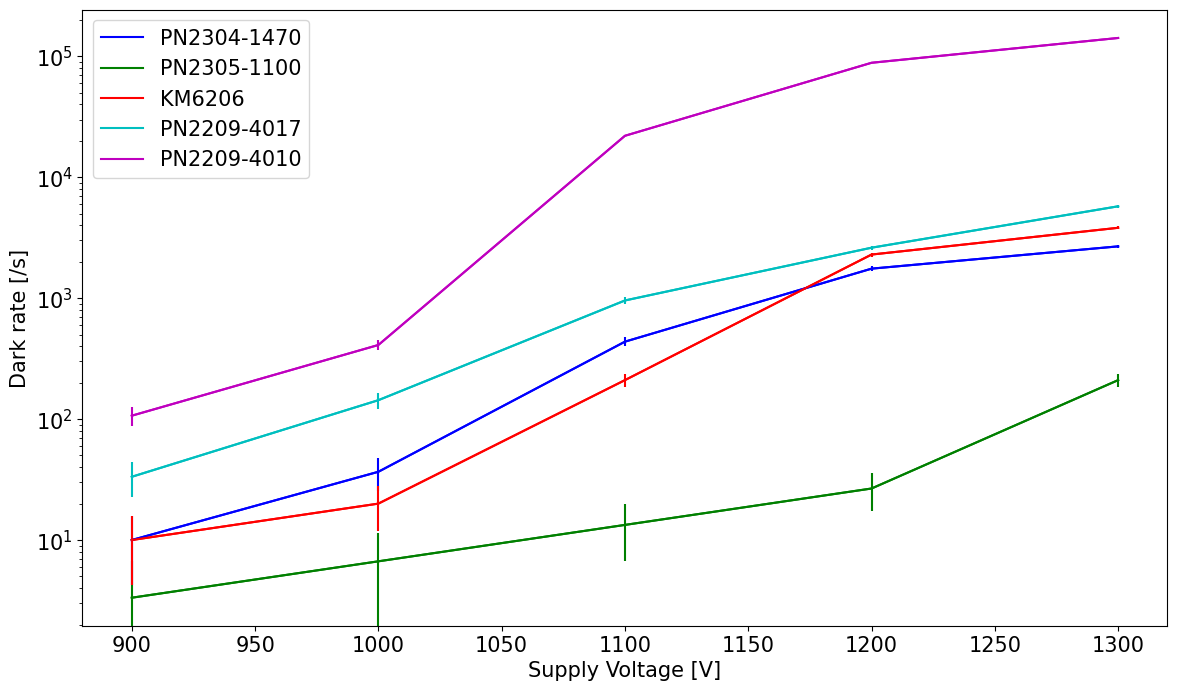

In [5]:
df_DR_HV.set_index('HV', inplace=True)

dr_fig, dr_ax = plt.subplots()
dr_fig.set_size_inches(14,8)

for idx,col in enumerate(new_cols[1:]):      
    if 'KM' in col:
        marker = markers[0]
    elif 'PN' in col:
        marker = markers[1]
        if 'PN23' in col:
            marker = markers[2]
    if '(NNVT)' in col:
        marker = markers[3]
        
    if type(df_DR_HV[col].values[0]) != str:
        val =  [float(str_v) for str_v in df_DR_HV[col].values]
        err = []
    else:
        val = [ str_v.replace('(', '').replace(')','').split(',')[0] for str_v in df_DR_HV[col].values ]
        err = [ str_v.replace('(', '').replace(')','').split(',')[1] for str_v in df_DR_HV[col].values ]
        val = [float(i) for i in val]
        err = [float(i) for i in err]
    
    color=colors[idx]
    format_str = "{color}{marker}-".format(color=color, marker=marker)
    dr_ax.plot(df_DR_HV.index.values, val, label=col, color=color)
    if len(err)>0:
        dr_ax.errorbar(df_DR_HV.index.values, y=val, yerr = err, color=color)
    #color=colors[idx]
    #format_str = "{color}{marker}-".format(color=color, marker=marker)

    dr_ax.legend(fontsize=fontsize)
    dr_ax.set_ylabel('Dark rate [/s]', fontsize=fontsize)
    dr_ax.set_xlabel('Supply Voltage [V]', fontsize=fontsize)
    dr_ax.set_yscale('log')
    dr_ax.tick_params(labelsize=fontsize)

save_file_name = './'+date_time_now+'_DR_HV.png'
dr_fig.savefig(save_file_name, dpi=300)